In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import jieba
import collections
from wordcloud import WordCloud

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体  
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

%matplotlib inline

In [47]:
df_authors = pd.read_csv('df_authors.csv')

In [48]:
df_authors['title2'] = df_authors['title'].apply(lambda x:x[13:])
df_authors['phase'] = df_authors['href'].apply(lambda x:x[-8:])

In [50]:
df_authors.sample(6)

,title,author,href,title2,phase
1349,快乐大本营20130511 快乐大本营之李准基首秀超毒舌 花美男上阵比娇媚,李准基,http://www.happycamp.cc/v/20130511,快乐大本营之李准基首秀超毒舌 花美男上阵比娇媚,20130511
1282,快乐大本营20130914 快乐大本营之童年照毁三观 娜姐留学终回归,朱梓骁,http://www.happycamp.cc/v/20130914,快乐大本营之童年照毁三观 娜姐留学终回归,20130914
496,快乐大本营20161119 何炅带你走进哈利波特魔法学院,埃迪·雷德梅,http://www.happycamp.cc/v/20161119,何炅带你走进哈利波特魔法学院,20161119
1220,快乐大本营20140118 快乐大本营之徐若瑄传不老秘籍 孙坚体会分娩痛,徐若瑄,http://www.happycamp.cc/v/20140118,快乐大本营之徐若瑄传不老秘籍 孙坚体会分娩痛,20140118
99,快乐大本营20180630 胡一天张亮携神秘礼物来袭,彭昱畅,http://www.happycamp.cc/v/20180630,胡一天张亮携神秘礼物来袭,20180630
1522,快乐大本营20120421 快乐大本营之黄晓明现场猛吃盒饭 张歆艺张译再登台,张译,http://www.happycamp.cc/v/20120421,快乐大本营之黄晓明现场猛吃盒饭 张歆艺张译再登台,20120421


In [21]:
gp_phase = df_authors['phase'].value_counts().reset_index()
gp_phase.columns = ['phase','count']
gp_phase

,phase,count
0,20140705,14
1,20170729,13
2,20170708,12
3,20170722,12
4,20101009,11
5,20180414,10
6,20140524,9
7,20170805,9
8,20110917,8
9,20180120,8


In [20]:
gp_author = df_authors['author'].value_counts().reset_index()
gp_author.columns = ['author','count']
gp_author

,author,count
0,None,159
1,张杰,17
2,武艺,17
3,韩庚,15
4,魏大勋,14
5,张翰,13
6,陈学冬,12
7,孙坚,12
8,张亮,12
9,李易峰,12


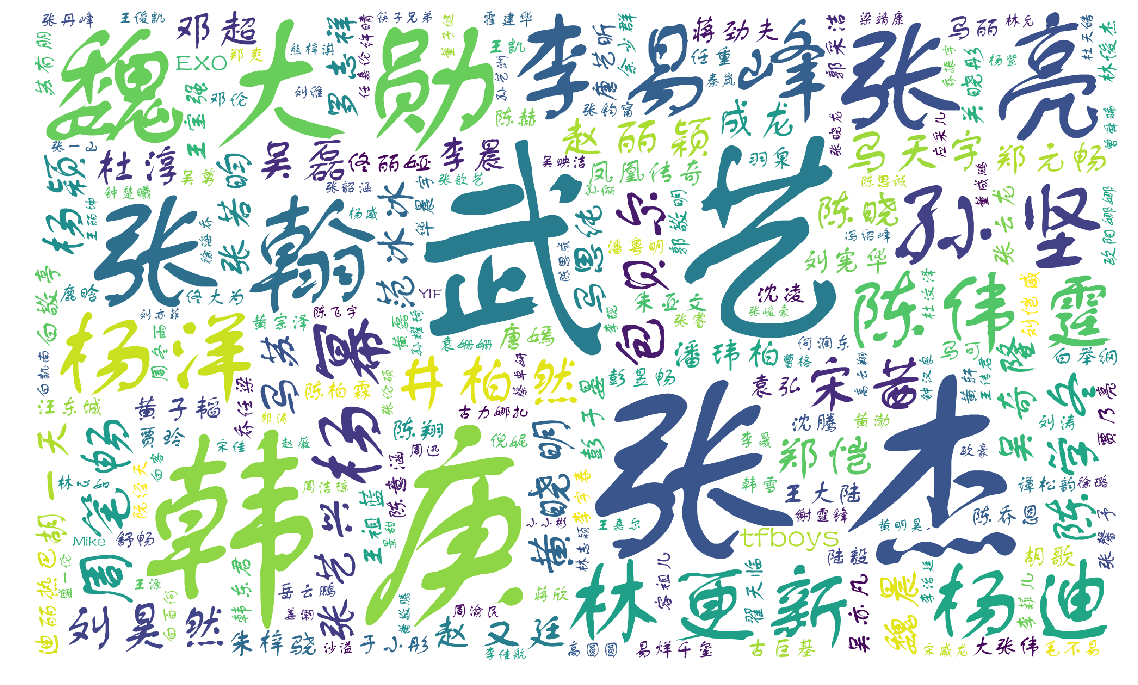

In [59]:
plt.figure(figsize=(20,12))
font = r'C:\Windows\Fonts\FZSTK.TTF'
lst_author_count = df_authors[df_authors['author']!='None']['author'].values.tolist()
wc = WordCloud(font_path=font,background_color="white",width=2000, height=1200, margin=2).generate(' '.join(lst_author_count))
plt.imshow(wc)
plt.axis('off')
plt.show()

1848

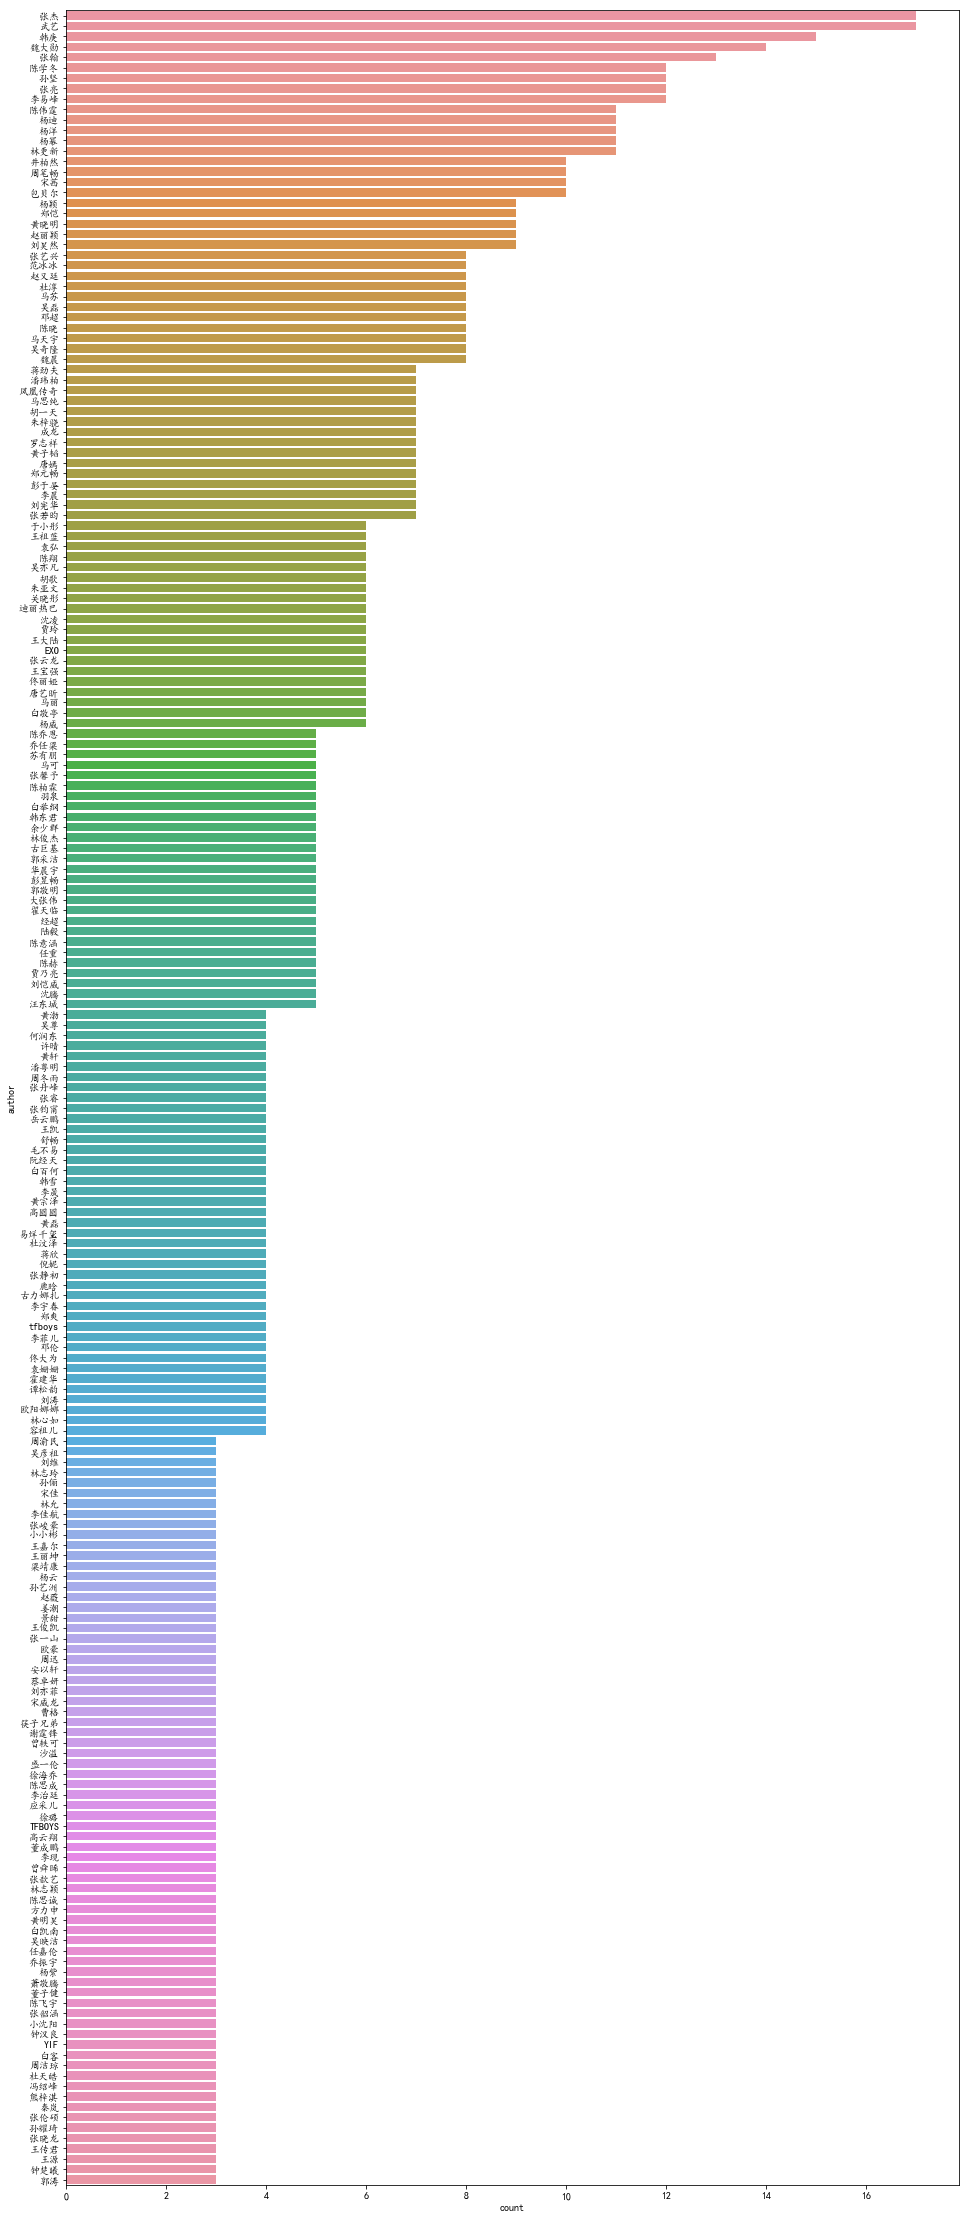

In [80]:
plt.figure(figsize=(16,40))
sns.barplot(x="count", y="author", 
            data=gp_author[(gp_author['author'] != 'None') & (gp_author['count'] > 2)].sort_values(by="count", ascending=False))
plt.savefig('author_count.png')
plt.show()

In [19]:
gp_author[gp_author['author'] != 'None']['count'].mean()

2.3157894736842106

In [22]:
df_authors[df_authors['author'] == '张杰']

,title,author,href,phase
21,快乐大本营20190216 张杰Justin演绎飞行安全礼仪,张杰,http://www.happycamp.cc/v/20190216,20190216
57,快乐大本营20181013 吴磊王嘉尔携各路高手挑战不可能,张杰,http://www.happycamp.cc/v/20181013,20181013
105,快乐大本营20180616 周洁琼开脑洞 阿拉蕾趣怼谢娜,张杰,http://www.happycamp.cc/v/20180616,20180616
110,快乐大本营20180609 谢娜竟遭评委张杰淘汰？,张杰,http://www.happycamp.cc/v/20180609,20180609
557,快乐大本营20160827 李易峰携《青云志》带你叱咤仙侠,张杰,http://www.happycamp.cc/v/20160827,20160827
570,快乐大本营20160806 张杰谢娜现场甜蜜秀恩爱,张杰,http://www.happycamp.cc/v/20160806,20160806
633,快乐大本营20160514 张杰谢娜甜蜜日常大公开,张杰,http://www.happycamp.cc/v/20160514,20160514
1011,快乐大本营20141025 快乐大本营之EXO用生命抹地 张杰遭最凶猛问答,张杰,http://www.happycamp.cc/v/20141025,20141025
1045,快乐大本营20140830 快乐大本营之丁俊晖秀梦幻台球 杰娜夫妇同场PK,张杰,http://www.happycamp.cc/v/20140830,20140830
1258,快乐大本营20131026 快乐大本营之张杰遇何炅萧敬腾 现场上演琼瑶剧,张杰,http://www.happycamp.cc/v/20131026,20131026


In [67]:
df_authors[df_authors['author'] == '彭昱畅']

,title,author,href,title2,phase,is_roulin
9,快乐大本营20190406 何炅黄磊彭昱畅三人惊喜同台,彭昱畅,http://www.happycamp.cc/v/20190406,何炅黄磊彭昱畅三人惊喜同台,20190406,0
37,快乐大本营20181222 彭昱畅许魏洲“智商”大PK！,彭昱畅,http://www.happycamp.cc/v/20181222,彭昱畅许魏洲“智商”大PK！,20181222,0
78,快乐大本营20180811 王鹤棣吴希泽吊桥PK难分胜负,彭昱畅,http://www.happycamp.cc/v/20180811,王鹤棣吴希泽吊桥PK难分胜负,20180811,0
99,快乐大本营20180630 胡一天张亮携神秘礼物来袭,彭昱畅,http://www.happycamp.cc/v/20180630,胡一天张亮携神秘礼物来袭,20180630,0
134,快乐大本营20180429 沈月于文文拍照大赛笑料不断 宋威龙彭昱畅上演“灵魂热舞”,彭昱畅,http://www.happycamp.cc/v/20180429,沈月于文文拍照大赛笑料不断 宋威龙彭昱畅上演“灵魂热舞”,20180429,0


In [73]:
gp_title = df_authors.groupby('title2').size().reset_index()
gp_title.columns = ['title2','count']

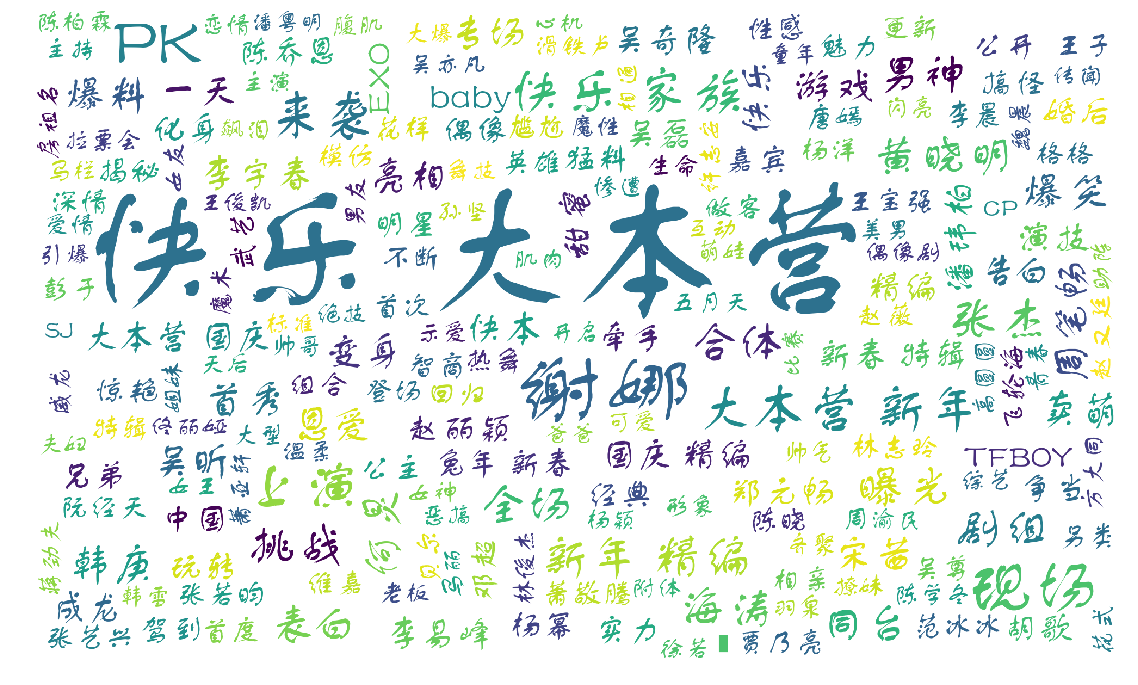

In [74]:
plt.figure(figsize=(20,12))
lst_title = ' '.join(gp_title['title2'].apply(lambda x:' '.join(jieba.cut(x))).values).split(' ')
wc = WordCloud(font_path=font,background_color="white",width=2000, height=1200, margin=2).generate(' '.join(lst_title))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [79]:
collections.Counter(lst_title)

Counter({'': 1692,
         'BOBO': 2,
         '萧敬腾': 4,
         'KIMIKO': 1,
         '教谢娜': 1,
         '变': 12,
         '妩媚': 1,
         '叫板': 2,
         '小S': 1,
         'Mike': 1,
         '购物车': 1,
         '大': 30,
         '公开': 5,
         '！': 24,
         'SJ': 3,
         '-': 5,
         'M': 4,
         '《': 28,
         'super': 1,
         'girl': 1,
         '》': 28,
         '狂': 7,
         '掀美': 1,
         '男': 12,
         '风暴': 1,
         '跳': 3,
         '贴身': 1,
         '舞秀': 2,
         '亲密': 2,
         '(': 27,
         '上': 10,
         ')': 27,
         'TFBOYS': 3,
         '李宇春': 7,
         '两代': 1,
         '偶像': 5,
         '首': 4,
         '同台': 9,
         'TFboy': 1,
         '齐耍': 1,
         '帅': 1,
         '萌化': 1,
         '众人': 1,
         '心': 5,
         'baby': 7,
         '婚后': 6,
         '女神': 3,
         '形象': 3,
         '覆灭': 1,
         '智商': 4,
         '上线': 2,
         '曝': 11,
         '私生活': 2,
         'duang': 1,
    

In [65]:
df_authors['is_roulin'] = df_authors['title2'].apply(lambda x:1 if '蹂躏' in x else 0)

In [66]:
df_authors[df_authors['is_roulin'] == 1]

,title,author,href,title2,phase,is_roulin
1081,快乐大本营20140705 快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,吴世勋,http://www.happycamp.cc/v/20140705,快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,20140705,1
1082,快乐大本营20140705 快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,黄子韬,http://www.happycamp.cc/v/20140705,快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,20140705,1
1083,快乐大本营20140705 快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,金珉硕,http://www.happycamp.cc/v/20140705,快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,20140705,1
1084,快乐大本营20140705 快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,金俊绵,http://www.happycamp.cc/v/20140705,快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,20140705,1
1085,快乐大本营20140705 快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,张艺兴,http://www.happycamp.cc/v/20140705,快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,20140705,1
1086,快乐大本营20140705 快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,EXO,http://www.happycamp.cc/v/20140705,快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,20140705,1
1087,快乐大本营20140705 快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,鹿晗,http://www.happycamp.cc/v/20140705,快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,20140705,1
1088,快乐大本营20140705 快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,金钟仁,http://www.happycamp.cc/v/20140705,快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,20140705,1
1089,快乐大本营20140705 快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,吴凡,http://www.happycamp.cc/v/20140705,快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,20140705,1
1090,快乐大本营20140705 快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,吴亦凡,http://www.happycamp.cc/v/20140705,快乐大本营之EXO男神玩转汉字游戏 嘉爷遭蹂躏,20140705,1
